In [1]:
!git clone https://github.com/lisquare4/FLDRL-in-Wireless-Communication
%cd /content/FLDRL-in-Wireless-Communication

Cloning into 'FLDRL-in-Wireless-Communication'...
remote: Enumerating objects: 336, done.
remote: Counting objects: 100% (336/336), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 336 (delta 145), reused 264 (delta 87), pack-reused 0
Receiving objects: 100% (336/336), 3.93 MiB | 28.16 MiB/s, done.
Resolving deltas: 100% (145/145), done.
/content/FLDRL-in-Wireless-Communication


In [5]:
import random
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.node import StationRl
from libs.channel import Channel
from tqdm import tqdm
from config import Config
import matplotlib.pyplot as plt
import pylab as pl
from mpl_toolkits.axes_grid1 import host_subplot

In [6]:
cfg = Config()
global_time = 0
channel = Channel(global_time, [])

station_num = 5
data_rate = 6  # Mbps
# All the lengeth is a mutible of slot

# incule header
pkt_len = 1560
# us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len
frame_len = pkt_len * 8 / slot_len / data_rate

In [7]:
def draw_loss_figure(stations_list, NUM_EPOCHS):
    for i in range(len(stations_list)):
        station = stations_list[i]
        loss = station.model.lossHitory
        # print(len(loss))

        host = host_subplot(111)  # row=1 col=1 first pic
        # ajust the right boundary of the plot window
        plt.subplots_adjust(right=0.8)
        par1 = host.twinx()   # 共享x轴

        # set labels
        host.set_xlabel("steps")
        host.set_ylabel("loss")
        # par1.set_ylabel("test-accuracy")

        # plot curves
        # grid = range(min(len(loss), len(loss_2), len(loss_3)))
        p1, = host.plot(range(len(loss)), loss, label="loss")
        # p2, = host.plot(range(len(loss_2)), loss_2, label="loss 2")

        # set location of the legend,
        # 1->rightup corner, 2->leftup corner, 3->leftdown corner
        # 4->rightdown corner, 5->rightmid ...
        host.legend(loc=5)

        # set label color
        host.axis["left"].label.set_color(p1.get_color())
        # host.axis["left"].label.set_color(p2.get_color())
        # host.axis["left"].label.set_color(p3.get_color())
        # par1.axis["right"].label.set_color(p2.get_color())

        # set the range of x axis of host and y axis of par1
        # host.set_xlim([-200, 5200])
        # par1.set_ylim([-0.1, 1.1])

        plt.draw()
        
        plt.savefig('./fig/noAllocation/Epoch_{}_station_{}.jpg'.format(NUM_EPOCHS, i))
        
        plt.show()
        plt.close()

In [8]:
'''
NUM_EPOCHS = 1000
'''
cfg.NUM_EPOCHS = 1000
stations_list_1000 = []
total_time = 0
for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel,
                             global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel,
                            global_time, i, timeout, ack_len, (i+1))
    stations_list_1000.append(station)

if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list_1000[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list_1000:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list_1000)

for station in stations_list_1000:
    total_time += station.total_pkt_time

    if cfg.stationType == "RL" and cfg.saveModel:
        station.saveModel()
print("==> total_time:", total_time)
total_time_channel = 0

  2%|▏         | 22/1000 [00:00<00:07, 131.38it/s]

==> startEpoch:  0


100%|██████████| 1000/1000 [00:11<00:00, 85.22it/s]

==> total_time: 832.0


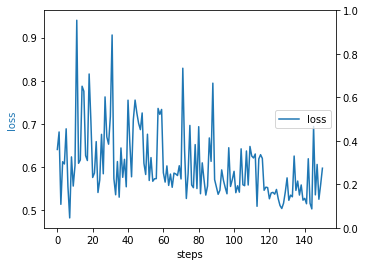

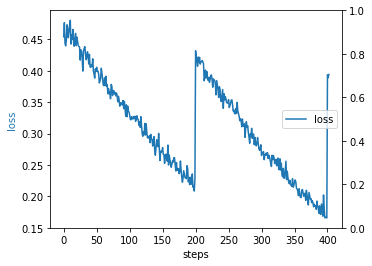

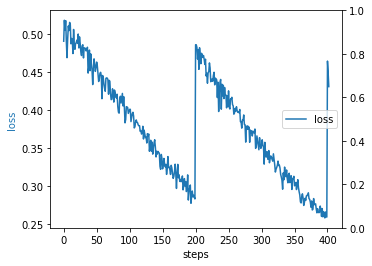

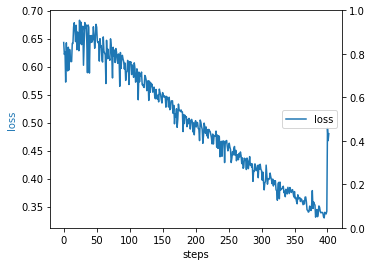

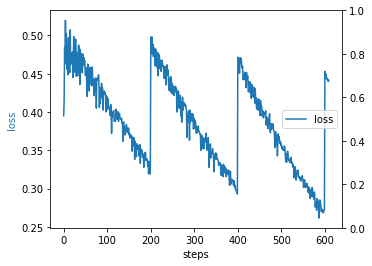

In [9]:
draw_loss_figure(stations_list_1000, 1000)

In [10]:
'''
NUM_EPOCHS = 5000
'''
cfg.NUM_EPOCHS = 5000
stations_list_5000 = []
total_time = 0
for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel,
                             global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel,
                            global_time, i, timeout, ack_len, (i+1))
    stations_list_5000.append(station)

if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list_5000[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list_5000:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list_5000)

for station in stations_list_5000:
    total_time += station.total_pkt_time

    if cfg.stationType == "RL" and cfg.saveModel:
        station.saveModel()
print("==> total_time:", total_time)
total_time_channel = 0

  0%|          | 25/5000 [00:00<00:22, 225.10it/s]

==> startEpoch:  0


100%|██████████| 5000/5000 [01:10<00:00, 71.42it/s]

==> total_time: 208.0


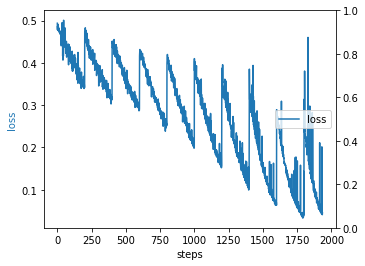

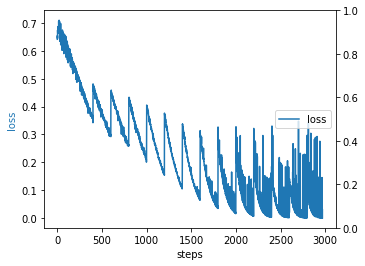

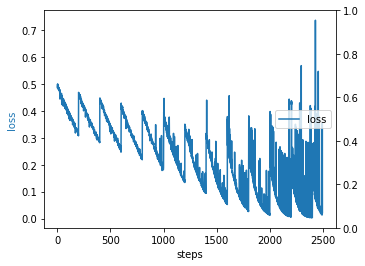

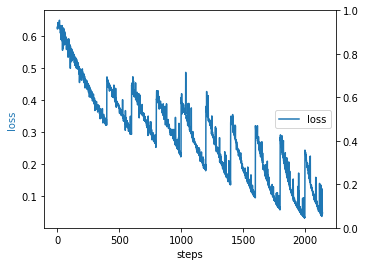

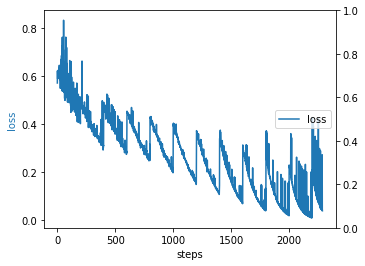

In [11]:
draw_loss_figure(stations_list_5000, 5000)

In [ ]:
'''
NUM_EPOCHS = 10000
'''
cfg.NUM_EPOCHS = 10000
stations_list_10000 = []
total_time = 0
for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel,
                             global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel,
                            global_time, i, timeout, ack_len, (i+1))
    stations_list_10000.append(station)

if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list_10000[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list_10000:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list_10000)

# for station in stations_list_10000:
#     total_time += station.total_pkt_time

#     if cfg.stationType == "RL" and cfg.saveModel:
#         station.saveModel()
        
# print("==> total_time:", total_time)
# total_time_channel = 0

In [ ]:
draw_loss_figure(stations_list_10000, 10000)

In [ ]:
'''
NUM_EPOCHS = 20000
'''
cfg.NUM_EPOCHS = 20000
stations_list_20000 = []
total_time = 0
for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel,
                             global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel,
                            global_time, i, timeout, ack_len, (i+1))
    stations_list_20000.append(station)

if cfg.stationType == "Dcf":
    startEpoch = 0
elif cfg.stationType == "RL":
    startEpoch = stations_list_20000[0].epoch

print("==> startEpoch: ", startEpoch)
for i in tqdm(range(startEpoch, startEpoch+cfg.NUM_EPOCHS)):
    for station in stations_list_20000:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list_20000)

# for station in stations_list_20000:
#     total_time += station.total_pkt_time

#     if cfg.stationType == "RL" and cfg.saveModel:
#         station.saveModel()
# print("==> total_time:", total_time)
# total_time_channel = 0

In [ ]:
draw_loss_figure(stations_list_20000, 20000)